In [2]:
import numpy as np
import pandas as pd

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [3]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [4]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [5]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [6]:
abalone_model = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
])

abalone_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                      optimizer=tf.optimizers.Adam())

2022-05-19 09:08:38.247433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 2ms/step - loss: 65.2416
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 12.4444
Epoch 3/10
104/104 [==============================] - 0s 3ms/step - loss: 8.4589
Epoch 4/10
104/104 [==============================] - 0s 3ms/step - loss: 8.0054
Epoch 5/10
104/104 [==============================] - 0s 3ms/step - loss: 7.5903
Epoch 6/10
104/104 [==============================] - 0s 3ms/step - loss: 7.2488
Epoch 7/10
104/104 [==============================] - 0s 4ms/step - loss: 6.9834
Epoch 8/10
104/104 [==============================] - 0s 3ms/step - loss: 6.7847
Epoch 9/10
104/104 [==============================] - 0s 3ms/step - loss: 6.6411
Epoch 10/10
104/104 [==============================] - 0s 3ms/step - loss: 6.5442


In [8]:
normalize = layers.Normalization()

In [9]:
normalize.adapt(abalone_features)

In [10]:
norm_abalone_model = tf.keras.Sequential([
    normalize,
    layers.Dense(64),
    layers.Dense(1)
])

norm_abalone_model.compile(loss=tf.losses.MeanSquaredError(),
                           optimizer=tf.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 5ms/step - loss: 93.0250
Epoch 2/10
104/104 [==============================] - 0s 4ms/step - loss: 55.8893
Epoch 3/10
104/104 [==============================] - 1s 6ms/step - loss: 18.5102
Epoch 4/10
104/104 [==============================] - 1s 5ms/step - loss: 6.0636
Epoch 5/10
104/104 [==============================] - 0s 4ms/step - loss: 5.0541
Epoch 6/10
104/104 [==============================] - 1s 5ms/step - loss: 4.9404
Epoch 7/10
104/104 [==============================] - 1s 6ms/step - loss: 4.9123
Epoch 8/10
104/104 [==============================] - 1s 6ms/step - loss: 4.9424
Epoch 9/10
104/104 [==============================] - 0s 4ms/step - loss: 4.8998
Epoch 10/10
104/104 [==============================] - 0s 4ms/step - loss: 4.8821


In [11]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [12]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [13]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2 * input + 1

# the result doesn't have a value
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [14]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [15]:
print(calc(1).numpy())
print(calc(2).numpy())

3.0
5.0


In [16]:
inputs = {}

for name, column in titanic_features.items():
    dtype = column.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32

    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [17]:
numeric_inputs = {name: input for name, input in inputs.items()
                  if input.dtype == tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

In [18]:
preprocessed_inputs = [all_numeric_inputs]

In [19]:
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue

    lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
    one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

    x = lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x)

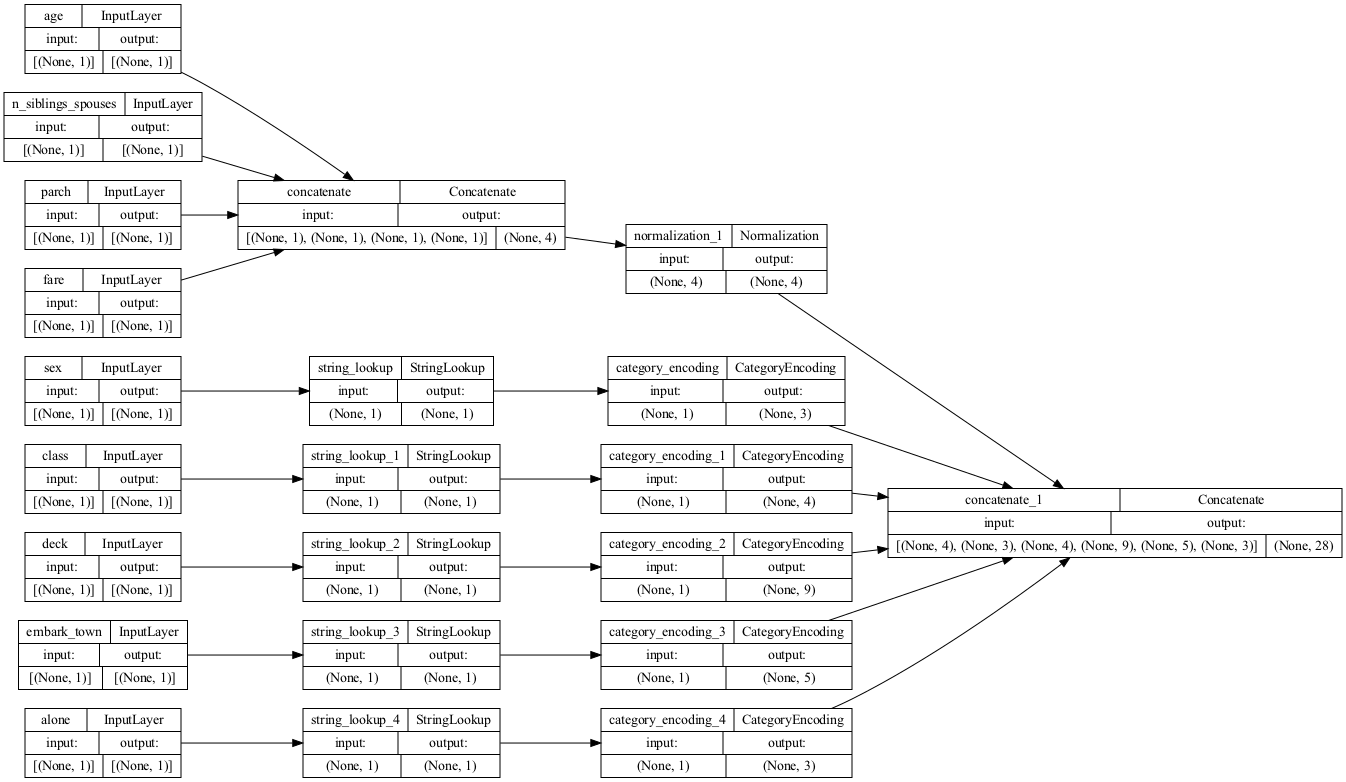

In [20]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model=titanic_preprocessing, rankdir="LR", dpi=72, show_shapes=True)

In [21]:
titanic_features_dict = {name: np.array(value) for name, value in titanic_features.items()}

In [22]:
features_dict = {name: values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [23]:
def titanic_model(preprocessing_head, inputs):
    body = tf.keras.Sequential([
        layers.Dense(64),
        layers.Dense(1)
    ])

    preprocessed_inputs = preprocessing_head(inputs)
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result)

    model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tf.optimizers.Adam())
    return model


titanic_model = titanic_model(titanic_preprocessing, inputs)

In [24]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 2s 4ms/step - loss: 0.6410
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5294
Epoch 3/10
20/20 [==============================] - 0s 6ms/step - loss: 0.4934
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 0.4670
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4513
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4394
Epoch 7/10
20/20 [==============================] - 0s 16ms/step - loss: 0.4333
Epoch 8/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4285
Epoch 9/10
20/20 [==============================] - 0s 6ms/step - loss: 0.4251
Epoch 10/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4237


In [25]:
titanic_model.save('../data/test')
reloaded = tf.keras.models.load_model('../data/test')

INFO:tensorflow:Assets written to: ../data/test/assets


In [26]:
features_dict = {name: values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before - after) < 1e-3
print(before)
print(after)

tf.Tensor([[-1.848]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.848]], shape=(1, 1), dtype=float32)


In [27]:
import itertools


def slices(features):
    for i in itertools.count():
        # For each feature take index `i`
        example = {name: values[i] for name, values in features.items()}
        yield example

In [28]:
for example in slices(titanic_features_dict):
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [29]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

In [30]:
for example in features_ds:
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


In [31]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

In [32]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

In [33]:
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 [==============================] - 1s 3ms/step - loss: 0.4222
Epoch 2/5
20/20 [==============================] - 0s 5ms/step - loss: 0.4220
Epoch 3/5
20/20 [==============================] - 0s 7ms/step - loss: 0.4209
Epoch 4/5
20/20 [==============================] - 0s 6ms/step - loss: 0.4204
Epoch 5/5
20/20 [==============================] - 0s 6ms/step - loss: 0.4206


In [34]:
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

In [35]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5,  # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True, )

In [36]:
for batch, label in titanic_csv_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value}")
    print()
    print(f"{'label':20s}: {label}")

sex                 : [b'male' b'male' b'male' b'male' b'male']
age                 : [28.  39.  30.5 40.  71. ]
n_siblings_spouses  : [0 0 0 1 0]
parch               : [0 0 0 4 0]
fare                : [ 7.25  24.15   8.05  27.9   34.654]
class               : [b'Third' b'Third' b'Third' b'Third' b'First']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'A']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Southampton' b'Cherbourg']
alone               : [b'y' b'y' b'y' b'n' b'y']

label               : [0 0 0 0 0]


In [37]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz',
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='../data/traffic')

In [38]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP")

for batch, label in traffic_volume_csv_gz_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value[:5]}")
    print()
    print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [298.2  272.52 295.52 287.27 285.66]
rain_1h             : [0.   0.   0.   0.25 0.  ]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [ 8 20  1 92 90]
weather_main        : [b'Rain' b'Clouds' b'Clear' b'Rain' b'Clouds']
weather_description : [b'light rain' b'few clouds' b'sky is clear' b'light rain'
 b'overcast clouds']
date_time           : [b'2013-08-06 19:00:00' b'2013-01-11 07:00:00' b'2013-05-19 22:00:00'
 b'2013-10-03 14:00:00' b'2013-05-27 02:00:00']

label               : [3458 6029 1713 5272  427]


In [39]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

...............................................................................................
CPU times: user 23.1 s, sys: 6.01 s, total: 29.1 s
Wall time: 22.1 s


In [40]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

...............................................................................................
CPU times: user 2.03 s, sys: 224 ms, total: 2.26 s
Wall time: 2.06 s


In [41]:
%%time
snapshot = tf.data.experimental.snapshot('../data/titanic.tfsnap')
snapshotting = traffic_volume_csv_gz_ds.apply(snapshot).shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
    if i % 40 == 0:
        print('.', end='')
print()

Instructions for updating:
Use `tf.data.Dataset.snapshot(...)`.
...............................................................................................
CPU times: user 2.66 s, sys: 359 ms, total: 3.02 s
Wall time: 2.39 s


In [42]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip', "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='../data/fonts',
    extract=True)

In [43]:
import pathlib

font_csvs = sorted(str(p) for p in pathlib.Path('../data/fonts').glob("*.csv"))

font_csvs[:10]

['../data/fonts/AGENCY.csv',
 '../data/fonts/ARIAL.csv',
 '../data/fonts/BAITI.csv',
 '../data/fonts/BANKGOTHIC.csv',
 '../data/fonts/BASKERVILLE.csv',
 '../data/fonts/BAUHAUS.csv',
 '../data/fonts/BELL.csv',
 '../data/fonts/BERLIN.csv',
 '../data/fonts/BERNARD.csv',
 '../data/fonts/BITSTREAMVERA.csv']

In [44]:
len(font_csvs)

153

In [45]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern="../data/fonts/*.csv",
    batch_size=10, num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size=10000)

In [46]:
for features in fonts_ds.take(1):
    for i, (name, value) in enumerate(features.items()):
        if i > 15:
            break
        print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

2022-05-19 09:09:55.906712: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2617 of 10000
2022-05-19 09:10:05.836187: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4947 of 10000
2022-05-19 09:10:15.862064: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 7274 of 10000
2022-05-19 09:10:25.849403: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 9506 of 10000
2022-05-19 09:10:28.185165: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


font                : [b'INFORMAL' b'STENCIL' b'HANDPRINT' b'HANDPRINT' b'TREBUCHET' b'GOUDY'
 b'OCRB' b'TREBUCHET' b'INFORMAL' b'OCRB']
fontVariant         : [b'INFORMAL ROMAN' b'STENCIL' b'scanned' b'scanned' b'TREBUCHET MS'
 b'GOUDY STOUT' b'scanned' b'TREBUCHET MS' b'INFORMAL ROMAN' b'scanned']
m_label             : [ 81 253  48  57 341 187  90 350 253  66]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [1 0 0 0 0 0 0 0 1 0]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [32 24  0  0 33 48  0 37 39  0]
m_left              : [24 20  0  0 25 26  0 23  8  0]
originalH           : [58 57 20 20 53 35 32 64 47 28]
originalW           : [52 40 12 10 21 43 20 27 55 26]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [  1   1   1   1   1 137   1   1   1 213]
r0c1                : [  1   1   1   1   1 152 255   1   1  73]
r0c2                : 

In [47]:
import re


def make_images(features):
    image = [None] * 400
    new_feats = {}

    for name, value in features.items():
        match = re.match('r(\d+)c(\d+)', name)
        if match:
            image[int(match.group(1)) * 20 + int(match.group(2))] = value
        else:
            new_feats[name] = value

    image = tf.stack(image, axis=0)
    image = tf.reshape(image, [20, 20, -1])
    new_feats['image'] = image

    return new_feats

In [48]:
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
    break

2022-05-19 09:11:21.743444: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3575 of 10000
2022-05-19 09:11:31.720999: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6388 of 10000
2022-05-19 09:11:41.731105: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 9045 of 10000
2022-05-19 09:11:45.585613: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


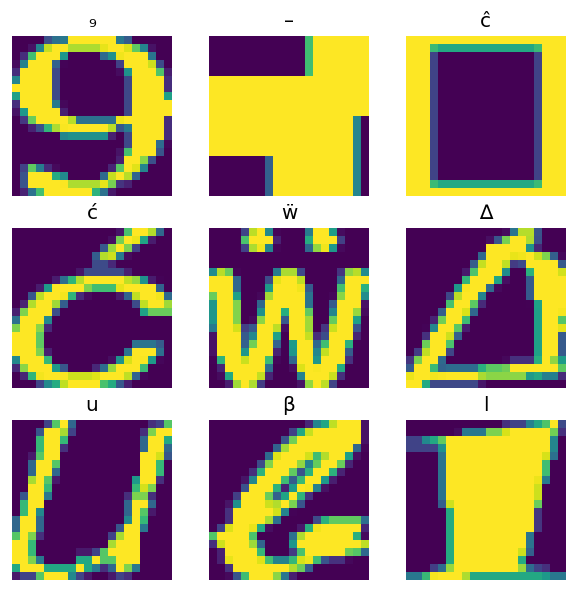

In [49]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6, 6), dpi=120)

for n in range(9):
    plt.subplot(3, 3, n + 1)
    plt.imshow(features['image'][..., n])
    plt.title(chr(features['m_label'][n]))
    plt.axis('off')

In [50]:
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]

all_strings = [str()] * 10
all_strings

['', '', '', '', '', '', '', '', '', '']

In [51]:
features = tf.io.decode_csv(lines, record_defaults=all_strings)

for f in features:
    print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [52]:
print(lines[0])

0,male,22.0,1,0,7.25,Third,unknown,Southampton,n


In [53]:
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]
titanic_types

[0, '', 0.0, 0, 0, 0.0, '', '', '', '']

In [54]:
features = tf.io.decode_csv(lines, record_defaults=titanic_types)

for f in features:
    print(f"type: {f.dtype.name}, shape: {f.shape}")

type: int32, shape: (627,)
type: string, shape: (627,)
type: float32, shape: (627,)
type: int32, shape: (627,)
type: int32, shape: (627,)
type: float32, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


In [55]:
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path, record_defaults=titanic_types, header=True)

for example in simple_titanic.take(1):
    print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [56]:
def decode_titanic_line(line):
    return tf.io.decode_csv(line, titanic_types)


manual_titanic = (
    # Load the lines of text
    tf.data.TextLineDataset(titanic_file_path)
        # Skip the header row.
        .skip(1)
        # Decode the line.
        .map(decode_titanic_line)
)

for example in manual_titanic.take(1):
    print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


In [57]:
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

In [58]:
num_font_features = font_line.count(',') + 1
font_column_types = [str(), str()] + [float()] * (num_font_features - 2)

In [59]:
font_csvs[0]

'../data/fonts/AGENCY.csv'

In [60]:
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs,
    record_defaults=font_column_types,
    header=True)

In [61]:
for row in simple_font_ds.take(10):
    print(row[0].numpy())

b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


In [62]:
font_files = tf.data.Dataset.list_files("../data/fonts/*.csv")

In [63]:
print('Epoch 1:')
for f in list(font_files)[:5]:
    print("    ", f.numpy())
print('    ...')
print()

print('Epoch 2:')
for f in list(font_files)[:5]:
    print("    ", f.numpy())
print('    ...')

Epoch 1:
     b'../data/fonts/VINETA.csv'
     b'../data/fonts/ROMAN.csv'
     b'../data/fonts/BAITI.csv'
     b'../data/fonts/FORTE.csv'
     b'../data/fonts/TW.csv'
    ...

Epoch 2:
     b'../data/fonts/REFERENCE.csv'
     b'../data/fonts/VIN.csv'
     b'../data/fonts/SYLFAEN.csv'
     b'../data/fonts/CALIBRI.csv'
     b'../data/fonts/NIRMALA.csv'
    ...


In [64]:
def make_font_csv_ds(path):
    return tf.data.experimental.CsvDataset(
        path,
        record_defaults=font_column_types,
        header=True)

In [65]:
font_rows = font_files.interleave(make_font_csv_ds, cycle_length=3)

In [66]:
fonts_dict = {'font_name': [], 'character': []}

for row in font_rows.take(10):
    fonts_dict['font_name'].append(row[0].numpy().decode())
    fonts_dict['character'].append(chr(row[2].numpy()))

pd.DataFrame(fonts_dict)

,font_name,character
0,PALACE,
1,BERLIN,ﬂ
2,PALATINO,￼
3,PALACE,
4,BERLIN,ﬁ
5,PALATINO,ﬆ
6,PALACE,◊
7,BERLIN,
8,PALATINO,ﬅ
9,PALACE,≥


In [67]:
BATCH_SIZE = 1024
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern="../data/fonts/*.csv",
    batch_size=BATCH_SIZE, num_epochs=1,
    num_parallel_reads=100)

In [68]:
%%time
for i, batch in enumerate(fonts_ds.take(10)):
    print('.', end='')

print()

2022-05-19 09:13:22.105644: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2873 of 10000
2022-05-19 09:13:32.030417: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5567 of 10000
2022-05-19 09:13:42.163010: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 8417 of 10000
2022-05-19 09:13:48.063250: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


..........
CPU times: user 1min 47s, sys: 1h 13min 1s, total: 1h 14min 49s
Wall time: 1h 44min 11s


In [69]:
fonts_files = tf.data.Dataset.list_files("../data/fonts/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname: tf.data.TextLineDataset(fname).skip(1),
    cycle_length=100).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda x: tf.io.decode_csv(x, record_defaults=font_column_types))

In [70]:
%%time
for i, batch in enumerate(fonts_fast.take(10)):
    print('.', end='')

print()

..........
CPU times: user 1.46 s, sys: 130 ms, total: 1.59 s
Wall time: 1.09 s
